In [1]:
import pandas as pd

# 从URL导入数据
url = "https://storage.googleapis.com/dft-statistics/road-traffic/downloads/rawcount/region_id/dft_rawcount_region_id_3.csv"
data = pd.read_csv(url)

# 查看前几行数据以确保成功加载
print(data.head())

print(data.shape)

# 检查每列中的缺失值数量
missing_values = data.isnull().sum()

# 只显示有缺失值的列
missing_columns = missing_values[missing_values > 0]

print("含有缺失值的列及其缺失值数量：")
print(missing_columns)

# 删除含有缺失值的列
data_cleaned = data.dropna(axis=1)

# 查看新的数据集的行列数
print("删除含有缺失值的列后，数据的形状（行数，列数）：")
print(data_cleaned.shape)

   count_point_id direction_of_travel  year  count_date  hour  region_id  \
0              62                   E  2021  2021-09-15     7          3   
1              62                   E  2021  2021-09-15     8          3   
2              62                   E  2021  2021-09-15     9          3   
3              62                   E  2021  2021-09-15    10          3   
4              62                   E  2021  2021-09-15    11          3   

  region_name  local_authority_id local_authority_name road_name  ...  \
0    Scotland                   4    North Lanarkshire       M80  ...   
1    Scotland                   4    North Lanarkshire       M80  ...   
2    Scotland                   4    North Lanarkshire       M80  ...   
3    Scotland                   4    North Lanarkshire       M80  ...   
4    Scotland                   4    North Lanarkshire       M80  ...   

  buses_and_coaches lgvs hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
0                 1  707               

/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_10594/1092338246.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [3]:


# 选择需要处理的七列
vehicle_columns = [
    'pedal_cycles',
    'two_wheeled_motor_vehicles',
    'cars_and_taxis',
    'buses_and_coaches',
    'lgvs',
    'all_hgvs',
    'all_motor_vehicles'
]

# 针对整个数据框进行插值
for col in vehicle_columns:
    data_cleaned[col] = data_cleaned[col].interpolate(method='linear', inplace=False)


/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_10594/524582941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].interpolate(method='linear', inplace=False)


In [4]:
# 检查插值后的数据是否仍有缺失值
missing_after_interpolation = data_cleaned[vehicle_columns].isnull().sum()
print("插值后仍有缺失值的列及其数量：")
print(missing_after_interpolation)

# 结果检查（可选）：查看某个 count_point_id 的数据变化
sample_id = data['count_point_id'].iloc[0]
print(f"示例计数点（ID={sample_id}）的插值前后数据：")
print(data.loc[data['count_point_id'] == sample_id, vehicle_columns])
print(data_cleaned.loc[data_cleaned['count_point_id'] == sample_id, vehicle_columns])


插值后仍有缺失值的列及其数量：
pedal_cycles                  0
two_wheeled_motor_vehicles    0
cars_and_taxis                0
buses_and_coaches             0
lgvs                          0
all_hgvs                      0
all_motor_vehicles            0
dtype: int64
示例计数点（ID=62）的插值前后数据：
    pedal_cycles  two_wheeled_motor_vehicles  cars_and_taxis  \
0              0                           1            1741   
1              0                           1            1663   
2              0                           0            1178   
3              0                           0            1214   
4              0                           1            1367   
5              0                           2            1220   
6              0                           4            1311   
7              0                           5            1373   
8              0                           5            1481   
9              0                           4            1904   
10             0      

In [5]:
# Step 1: 导入数据（假设已经完成插值处理后的 data_cleaned 数据）
data = data_cleaned

# Step 2: 从 road_name 提取道路类别，并创建新列 road_category
data['road_category'] = data['road_name'].str[0]

# Step 3: 筛选出 M, A, B, C, U 五种道路类型的数据
data = data[data['road_category'].isin(['M', 'A', 'B', 'C', 'U'])]

data_cleaned=data

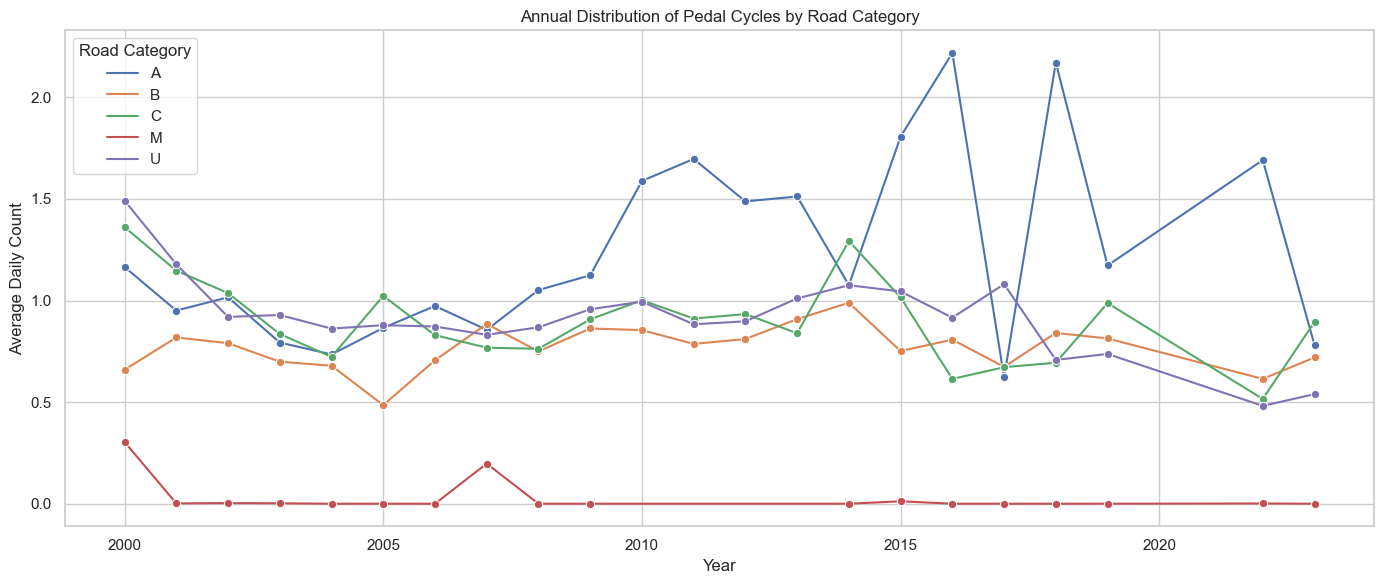

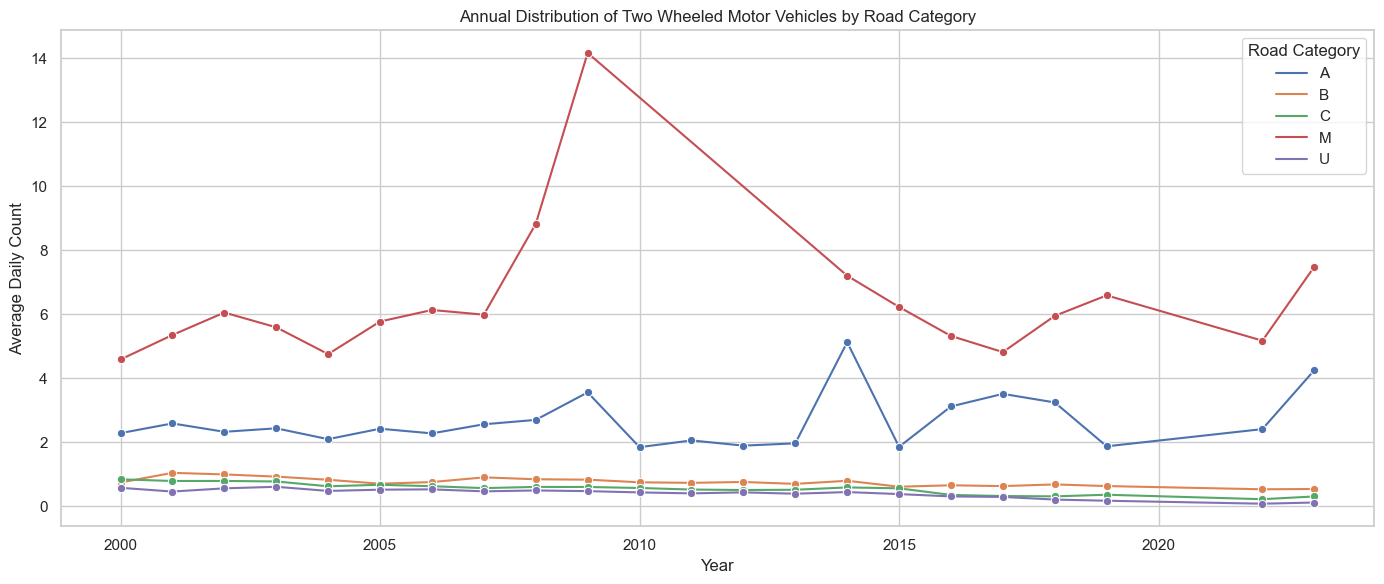

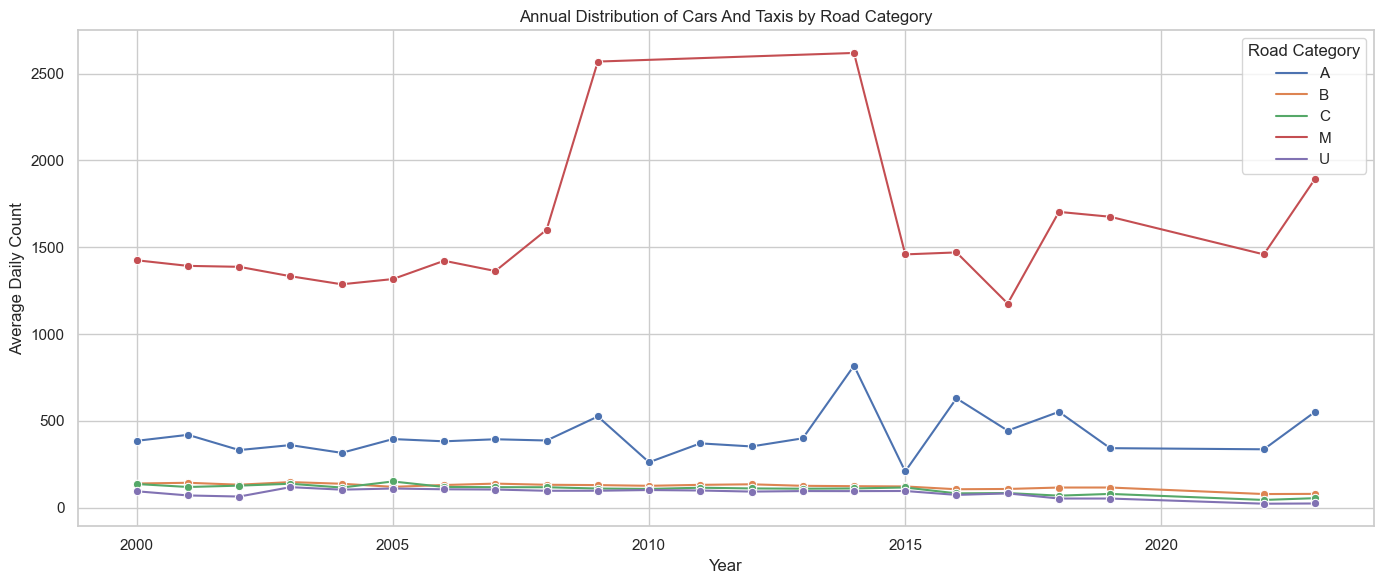

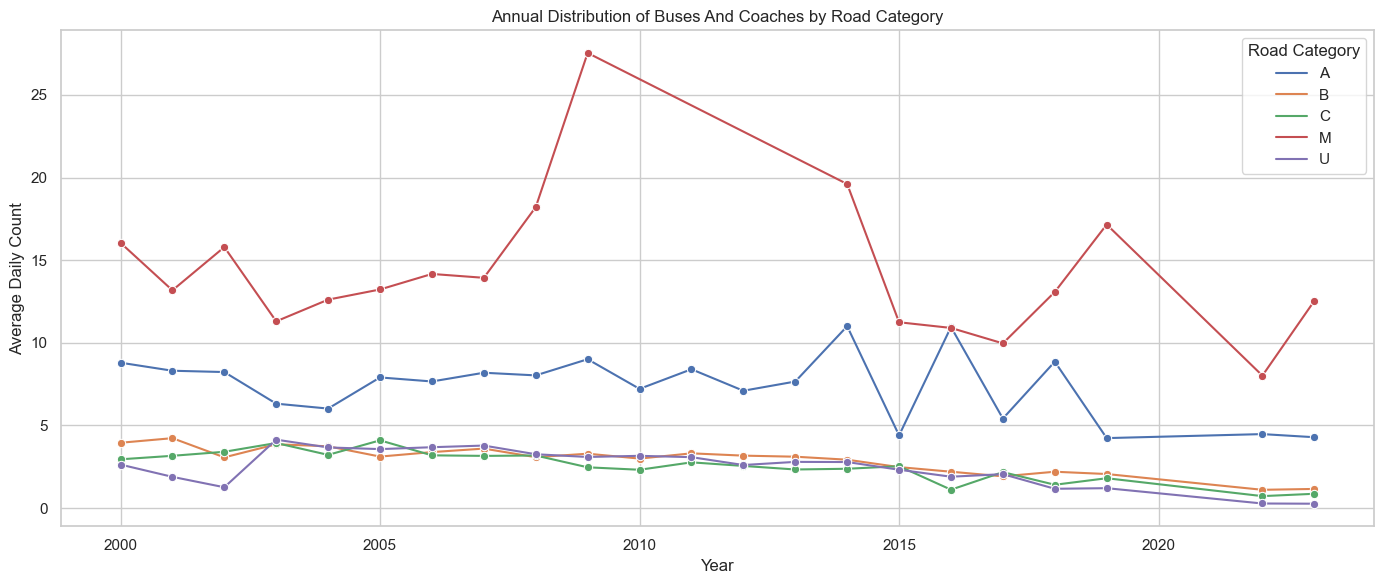

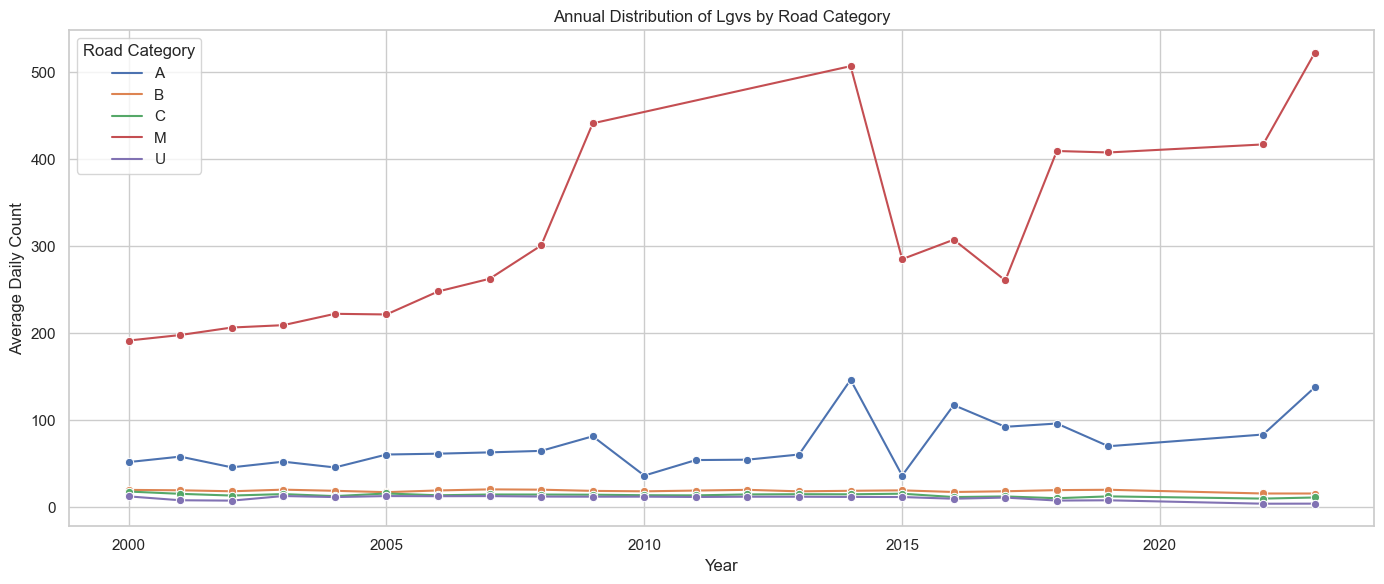

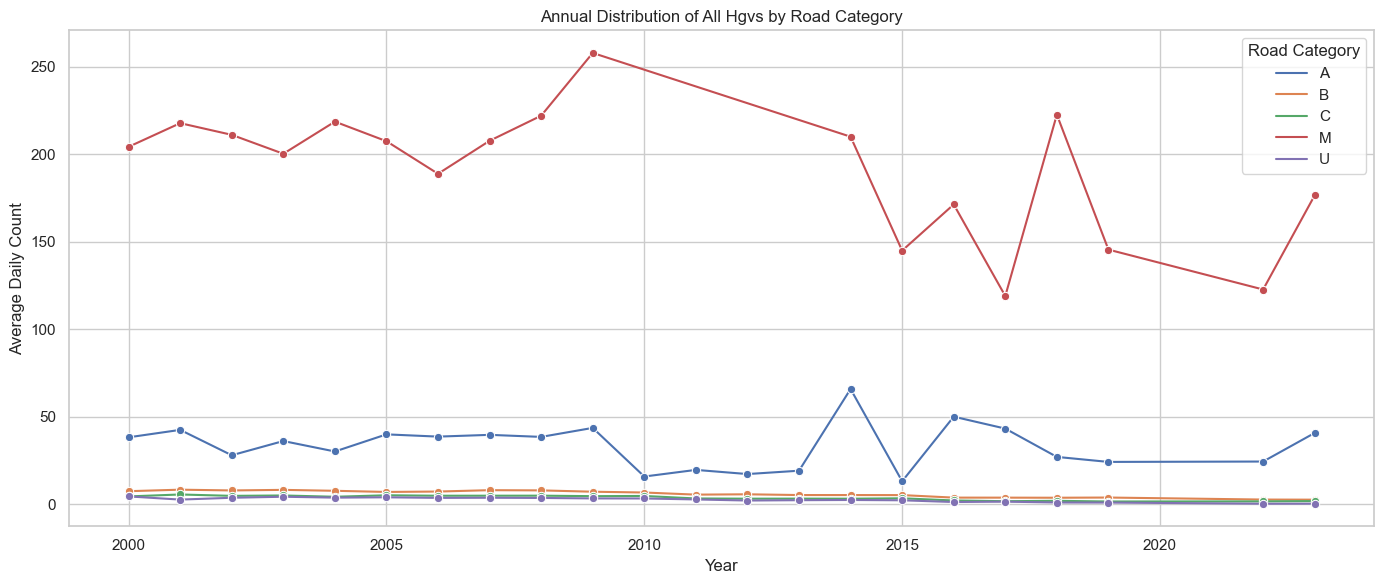

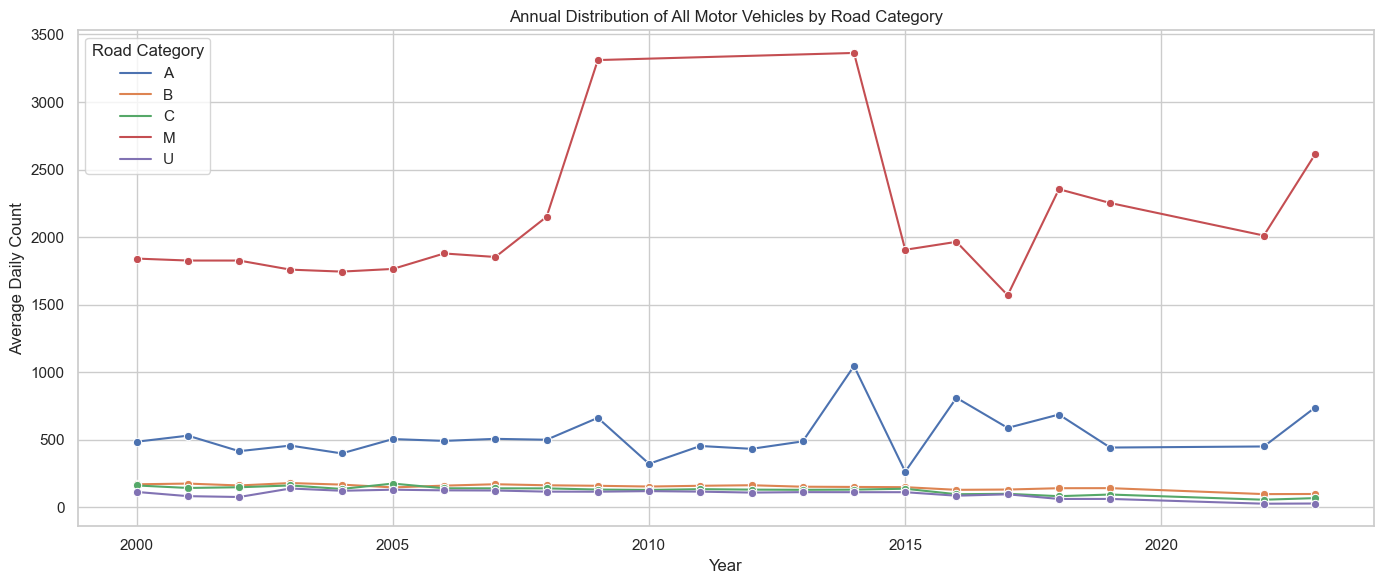

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 移除异常年份（2020 和 2021 年）
data_no_covid = data_cleaned[~data_cleaned['year'].isin([2020, 2021])]

# 按年和道路类型重新聚合数据
annual_road_vehicle_distribution_no_covid = data_no_covid.groupby(['year', 'road_category'])[vehicle_columns].mean().reset_index()
#  设置可视化风格
sns.set(style="whitegrid")

# 年度变化图表：不同道路类型的车辆类型分布趋势
for vehicle in vehicle_columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=annual_road_vehicle_distribution_no_covid , x='year', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Annual Distribution of {vehicle.replace('_', ' ').title()} by Road Category")
    plt.xlabel("Year")
    plt.ylabel("Average Daily Count")
    plt.legend(title="Road Category")
    plt.tight_layout()  # 自动调整布局避免图表拥挤
    plt.show()



Deviation Factors (2020 vs Normal Years):
{'M': {'pedal_cycles': 11.482758620689655, 'two_wheeled_motor_vehicles': 0.8070368205727644, 'cars_and_taxis': 1.0362282320101492, 'buses_and_coaches': 0.951426197314542, 'lgvs': 1.1884967501982897, 'all_hgvs': 1.0482321903867498, 'all_motor_vehicles': 1.0656750347953639}, 'A': {'pedal_cycles': 1.1672653694772437, 'two_wheeled_motor_vehicles': 0.8398227908895552, 'cars_and_taxis': 0.7905999848614312, 'buses_and_coaches': 0.5313107833428884, 'lgvs': 0.9975094172530801, 'all_hgvs': 0.9860220787244056, 'all_motor_vehicles': 0.8295996111635058}, 'B': {'pedal_cycles': 1.6480243499297391, 'two_wheeled_motor_vehicles': 0.7255081351070668, 'cars_and_taxis': 0.7363414788274719, 'buses_and_coaches': 0.49132343777164567, 'lgvs': 0.8890424870523369, 'all_hgvs': 0.7278926584755556, 'all_motor_vehicles': 0.75400089954268}, 'C': {'pedal_cycles': 1.945615268275848, 'two_wheeled_motor_vehicles': 0.95901550918875, 'cars_and_taxis': 0.8869961990124389, 'buses_and

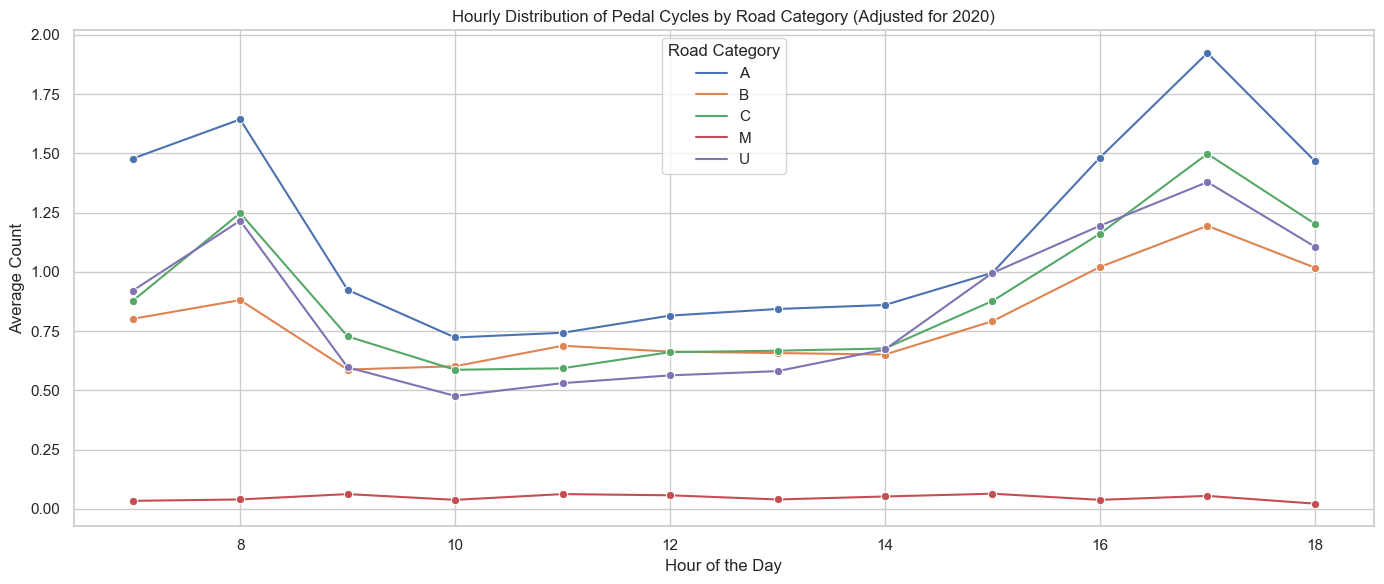

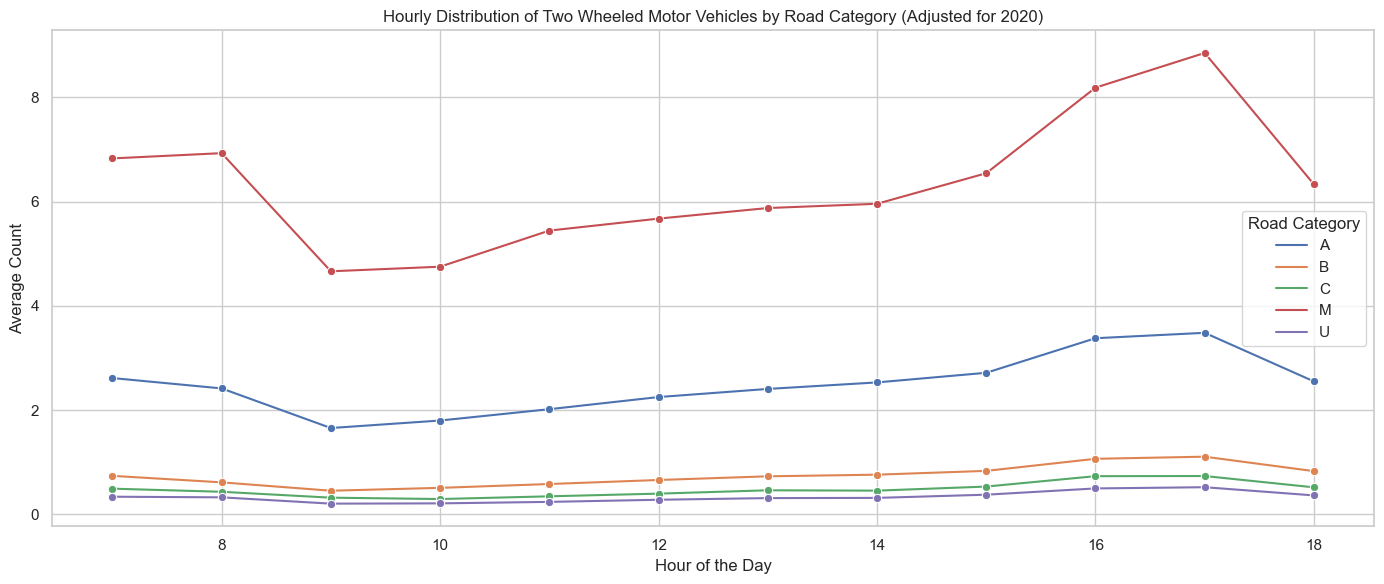

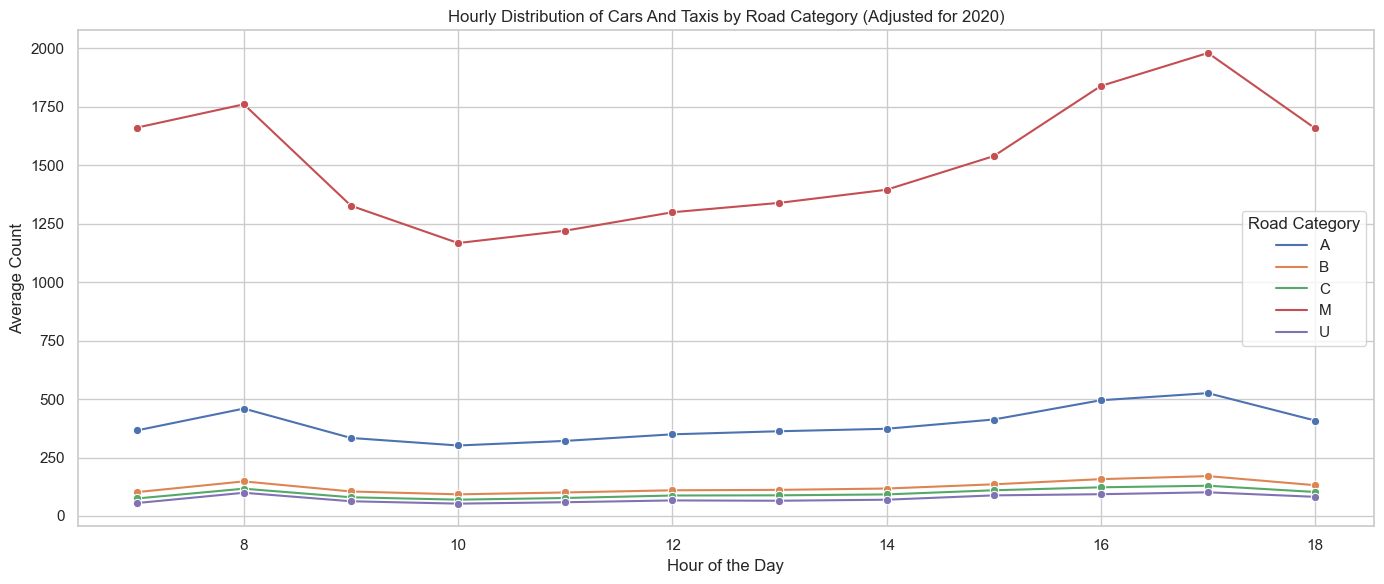

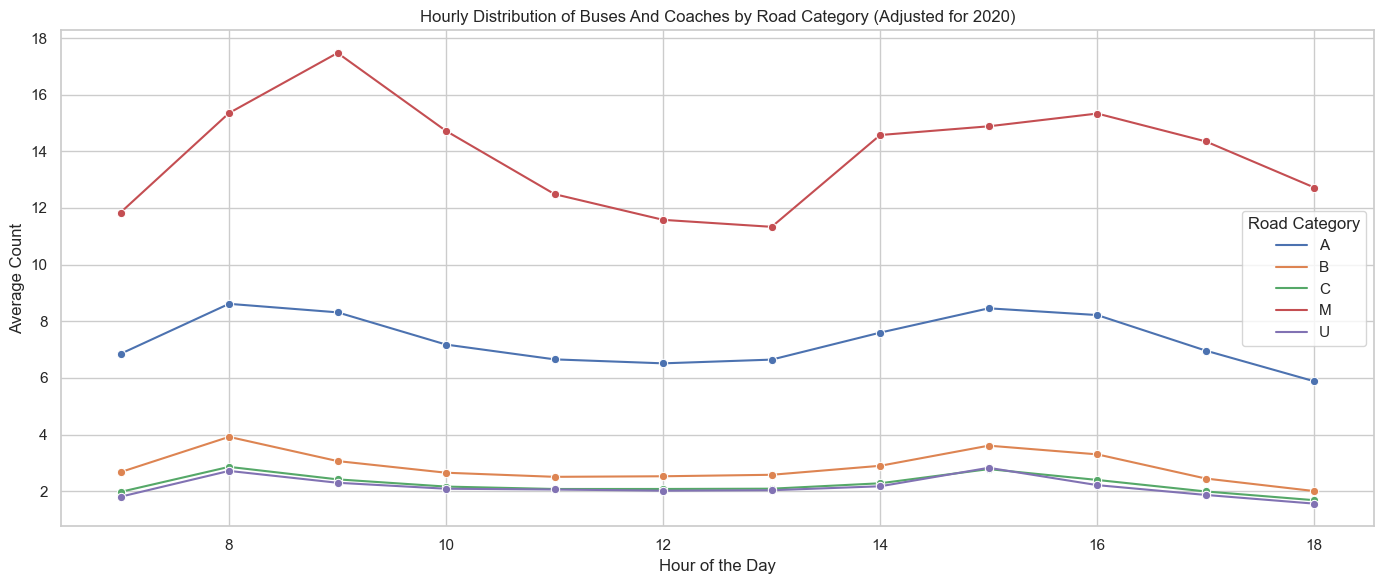

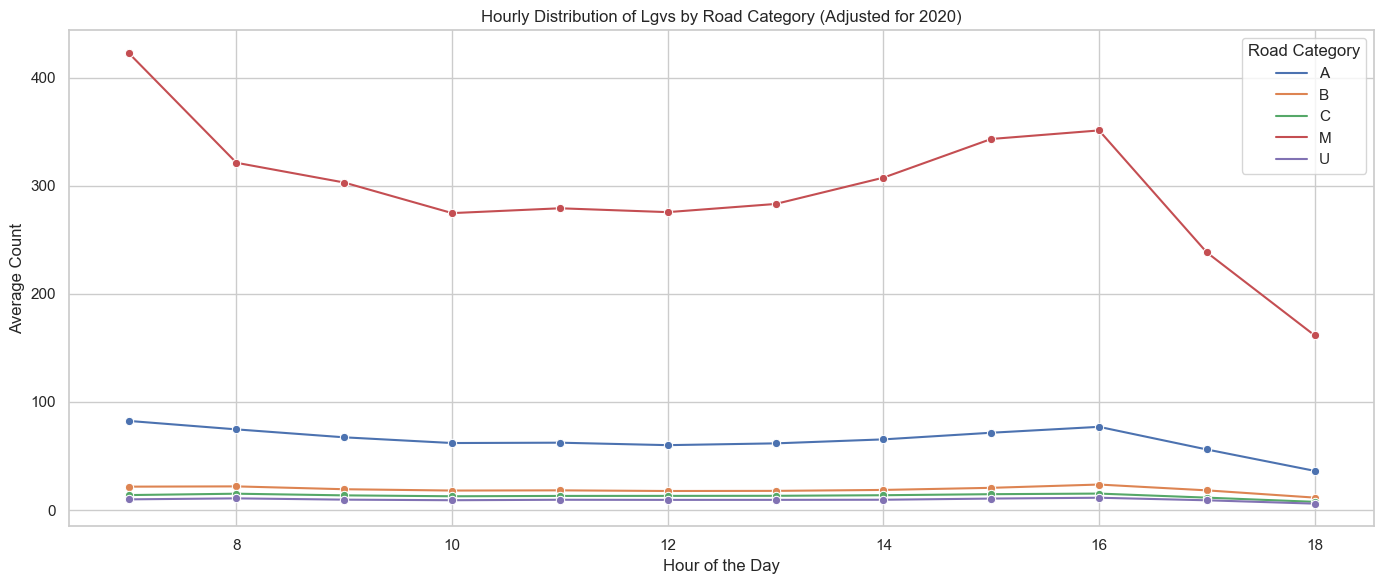

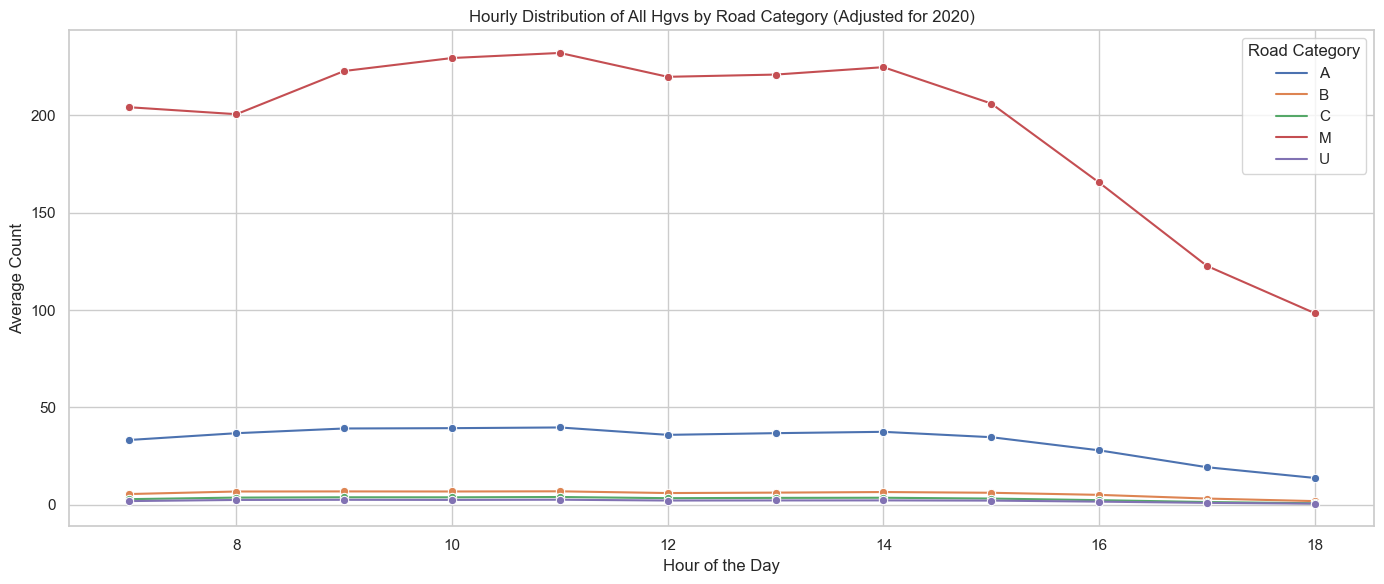

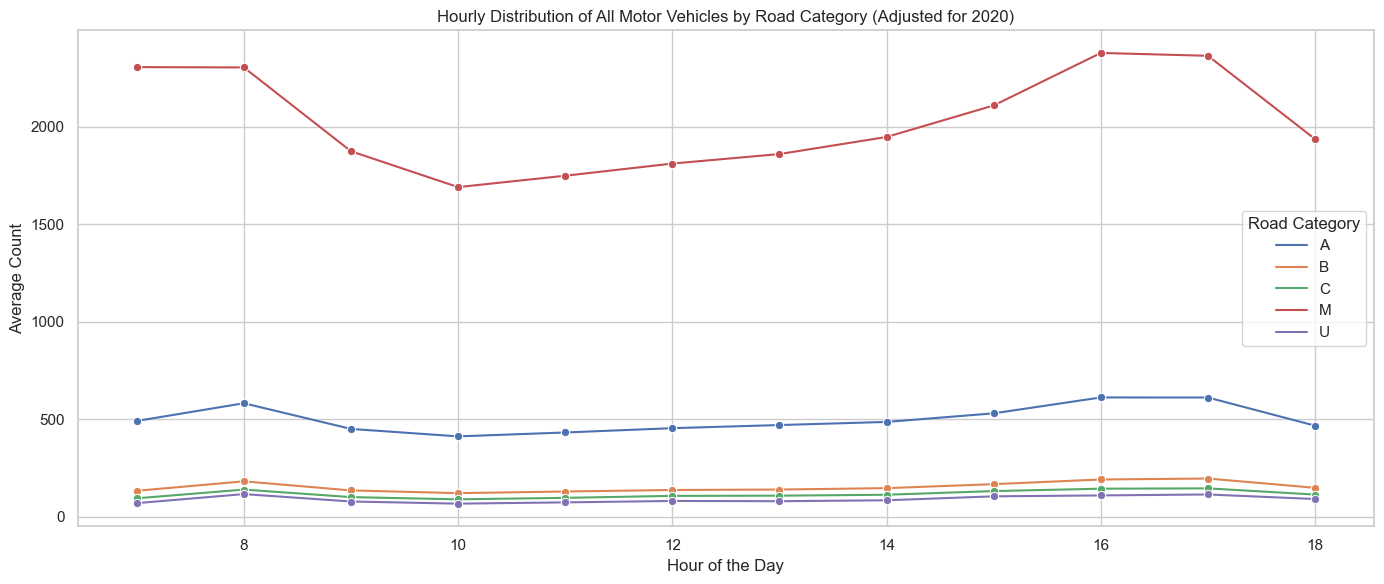

In [7]:
# Step 1: 定义正常年份和异常年份
normal_years = [2018, 2019, 2022]  # 定义正常年份
covid_year = 2020  # 定义异常年份

# Step 2: 按道路类型和车辆类型计算2020年的差异因子
deviation_factors = {}
for road in ['M', 'A', 'B', 'C', 'U']:
    deviation_factors[road] = {}
    for vehicle in vehicle_columns:
        # 计算正常年份的平均值
        avg_normal = data_cleaned[
            (data_cleaned['year'].isin(normal_years)) & (data_cleaned['road_category'] == road)
        ][vehicle].mean()
        
        # 计算2020年的平均值
        avg_covid = data_cleaned[
            (data_cleaned['year'] == covid_year) & (data_cleaned['road_category'] == road)
        ][vehicle].mean()
        
        # 避免除零错误
        if avg_normal > 0:
            deviation_factors[road][vehicle] = avg_covid / avg_normal
        else:
            deviation_factors[road][vehicle] = 1.0  # 如果没有正常年份的数据，假设无变化

# 输出差异因子供检查
print("Deviation Factors (2020 vs Normal Years):")
print(deviation_factors)

# Step 3: 对2020年的插值数据进行外推调整
hourly_distribution = data_cleaned.groupby(['hour', 'road_category'])[vehicle_columns].mean().reset_index()

for road in ['M', 'A', 'B', 'C', 'U']:
    for vehicle in vehicle_columns:
        # 获取对应道路类型和车辆类型的调整因子
        adjustment_factor = deviation_factors[road][vehicle]
        
        # 对2020年的插值数据进行调整
        hourly_distribution.loc[
            (hourly_distribution['road_category'] == road) & (data_cleaned['year'] == covid_year),
            vehicle
        ] *= adjustment_factor

# 输出调整后的 hourly_distribution 供检查
print("Hourly Distribution (Adjusted for 2020):")
print(hourly_distribution.head())

# Step 4: 绘制日内分布折线图
for vehicle in vehicle_columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=hourly_distribution, x='hour', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Hourly Distribution of {vehicle.replace('_', ' ').title()} by Road Category (Adjusted for 2020)")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Count")
    plt.legend(title="Road Category")
    plt.tight_layout()  # 自动调整布局
    plt.show()



q